In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/gaonk/OneDrive/Desktop/ML/MLPractice/ML Dataset/ML Dataset/insurance.csv")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(data.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [4]:
data = pd.DataFrame(data)
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'northeast' : 1, 'northwest' : 2, 'southeast' : 3, 'southwest' : 4})
print(data.head())
print(data.tail())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       4  16884.92400
1   18    1  33.770         1       0       3   1725.55230
2   28    1  33.000         3       0       3   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520
      age  sex    bmi  children  smoker  region     charges
1333   50    1  30.97         3       0       2  10600.5483
1334   18    0  31.92         0       0       1   2205.9808
1335   18    0  36.85         0       0       3   1629.8335
1336   21    0  25.80         0       0       4   2007.9450
1337   61    0  29.07         0       1       2  29141.3603


In [5]:
print(data.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [6]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
print(data.describe())

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.515695  13270.422265  
std       1.104885  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       3.000000   9382.033000  
75%       3.000000  16639.912515  
max       4.000000  63770.428010  


In [8]:
pd.DataFrame(data['bmi']).describe(percentiles = (1, 0.99, 0.90, 0.75, 0.50, 0.25, 0.10, 0.01))

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
1%,17.895150
10%,22.990000
25%,26.296250
50%,30.400000
75%,34.693750
90%,38.619500


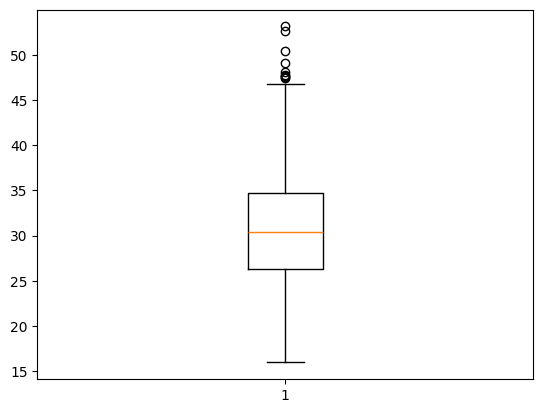

In [9]:
plt.boxplot(data['bmi'])
plt.show()

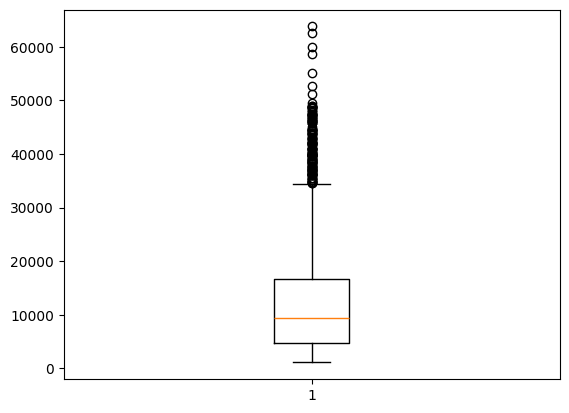

In [10]:
plt.boxplot(data['charges'])
plt.show()

In [11]:
bmi = pd.DataFrame(data['bmi'])
bmi_median = bmi.median()

Q1 = bmi.quantile(q = 0.25)
Q3 = bmi.quantile(q = 0.75)
IQR = Q3 - Q1

ll = int(Q1 - 1.5 * IQR)
ul = int(Q3 + 1.5 * IQR)

data.loc[data['bmi'] > ul , 'bmi'] = int(bmi.quantile(q = 0.90))
data.loc[data['bmi'] < ll , 'bmi'] = int(bmi.quantile(q = 0.01))

C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\2787118116.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ll = int(Q1 - 1.5 * IQR)
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\2787118116.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ul = int(Q3 + 1.5 * IQR)
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\2787118116.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['bmi'] > ul , 'bmi'] = int(bmi.quantile(q = 0.90))
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\2787118116.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['bmi'] < ll , 'bmi'] = int(bmi.quanti

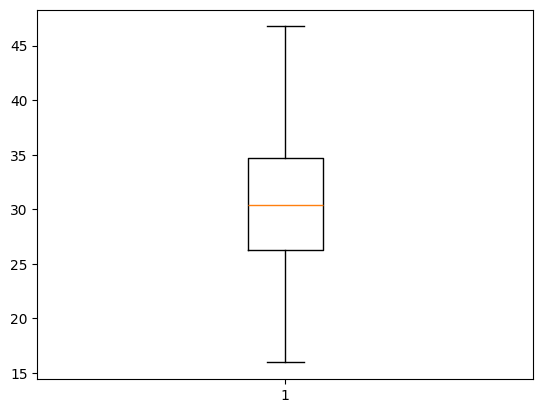

In [12]:
max(data['bmi'])
plt.boxplot(data['bmi'])
plt.show()

In [13]:
charges = pd.DataFrame(data['charges'])
charges_median = charges.median()

Q1 = charges.quantile(q = 0.25)
Q3 = charges.quantile(q = 0.75)
IQR = Q3 - Q1

ll = int(Q1 - 1.5 * IQR)
ul = int(Q3 + 1.5 * IQR)

data.loc[data['charges'] > ul , 'charges'] = int(charges.quantile(q = 0.90))
data.loc[data['charges'] < ll , 'charges'] = int(charges.quantile(q = 0.01))

C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\78776731.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ll = int(Q1 - 1.5 * IQR)
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\78776731.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ul = int(Q3 + 1.5 * IQR)
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\78776731.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['charges'] > ul , 'charges'] = int(charges.quantile(q = 0.90))
C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\78776731.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['charges'] < ll , 'charges'] = in

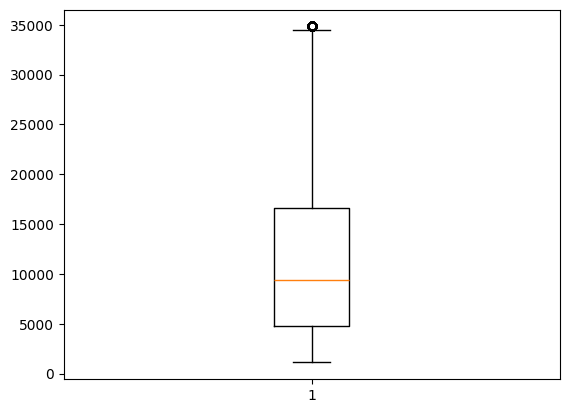

In [14]:
max(data['charges'])
plt.boxplot(data['charges'])
plt.show()

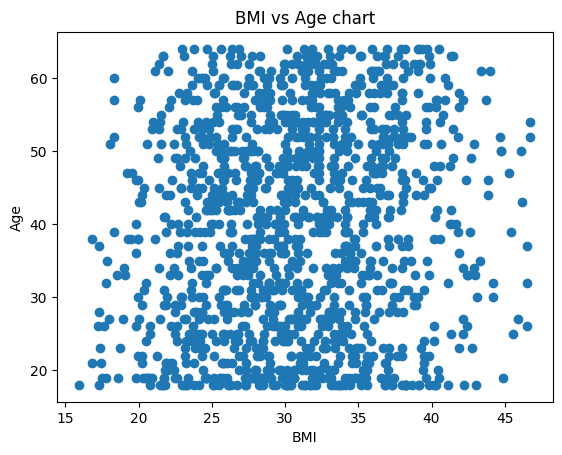

In [15]:
X = data['bmi']
Y = data['age']
plt.scatter(X, Y)
plt.title("BMI vs Age chart")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

C:\Users\gaonk\AppData\Local\Temp\ipykernel_23296\715337557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

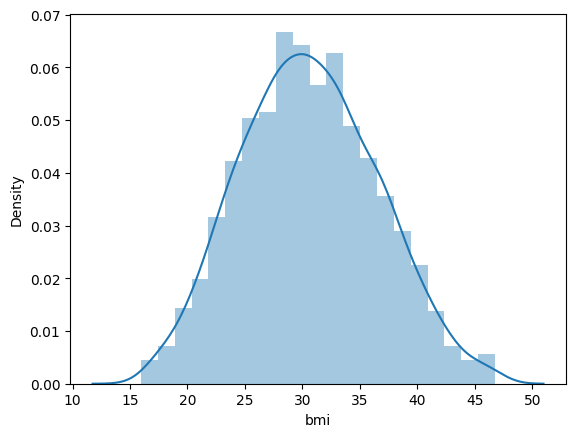

In [16]:
sns.distplot(data['bmi'])

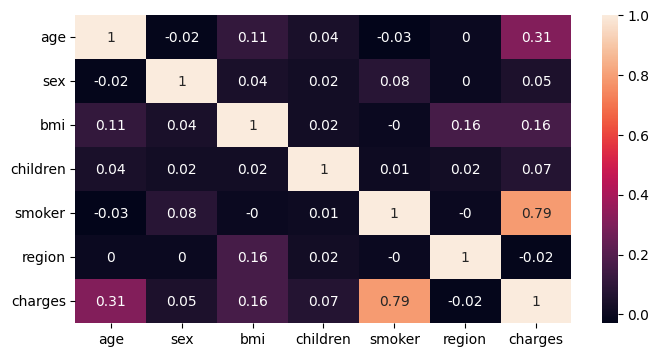

In [17]:
correlation_matrix = data.corr().round(2)
fgr, ax = plt.subplots(figsize = (8, 4))
c = sns.heatmap(data = correlation_matrix, annot = True)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

data_scaled = pd.DataFrame(scaled_data)
data_scaled.columns = data.columns

features = ["bmi","charges"]
response = ["age"]
x=data_scaled[features]
y=data_scaled[response]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

model = LinearRegression()
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test)
print(accuracy * 100, " %")

5.266666448844093  %


In [22]:
y_pred = model.predict(x_test)

print("R2 Score: ", metrics.r2_score(y_pred, y_test))
print("MSE Score: ", metrics.mean_squared_error(y_pred, y_test))

R2 Score:  -5.68986984154835
MSE Score:  0.08132206374345219
